In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt

# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
gdf = gpd.read_file('../data/external/Proximidad_Elevaciones/Area_Estudio/Area_Elevaciones_v2.geojson')
gdf

,geometry
0,"POLYGON ((-103.47743 20.63258, -103.47630 20.6..."


<AxesSubplot:>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
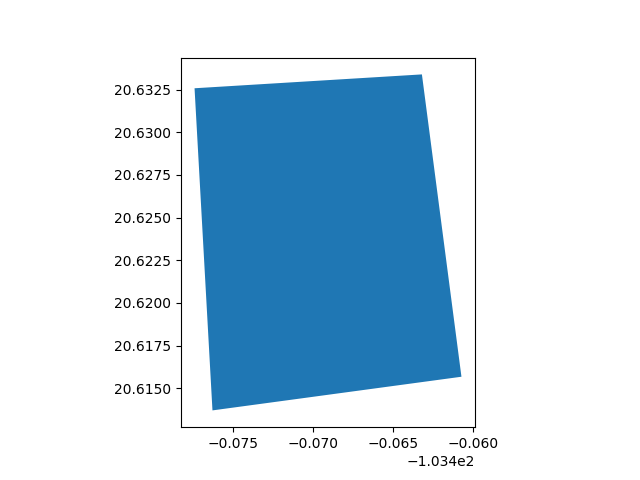

In [3]:
gdf.plot()

In [4]:
G,nodes,edges = aup.graph_from_hippo(gdf, 'osmnx')

In [5]:
print(nodes.shape)
nodes.head(2)

(711, 4)


,x,y,street_count,geometry
osmid,,,,
1648045055,-103.463277,20.623555,3,POINT (-103.46328 20.62355)
1653525938,-103.466560,20.632577,4,POINT (-103.46656 20.63258)


<AxesSubplot:>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
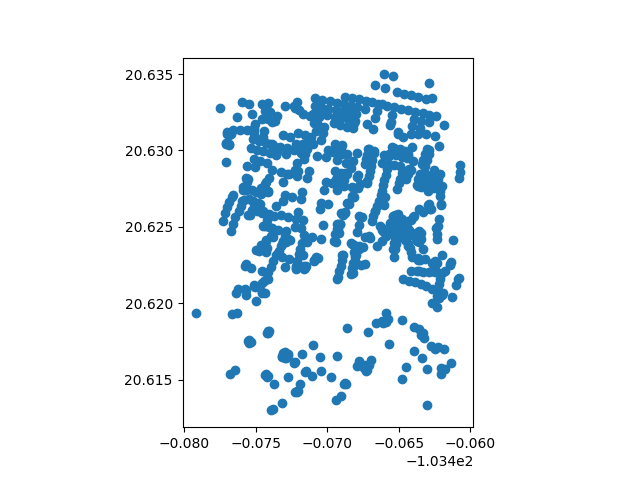

In [6]:
nodes.plot()

In [7]:
print(edges.shape)
edges.head(2)

(1627, 15)


,,,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,bridge,ref,junction,tunnel,access,width,service
u,v,key,,,,,,,,,,,,,,,
6575245580,6575245581,0,700187175,False,None,Privada Urano,living_street,None,120.539,"LINESTRING (-103.46596 20.63407, -103.46618 20...",None,None,None,None,None,None,None
6575245581,1653860926,0,466782610,False,2,Avenida Central,residential,None,29.396,"LINESTRING (-103.46618 20.63301, -103.46646 20...",None,None,None,None,None,None,None


<AxesSubplot:>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
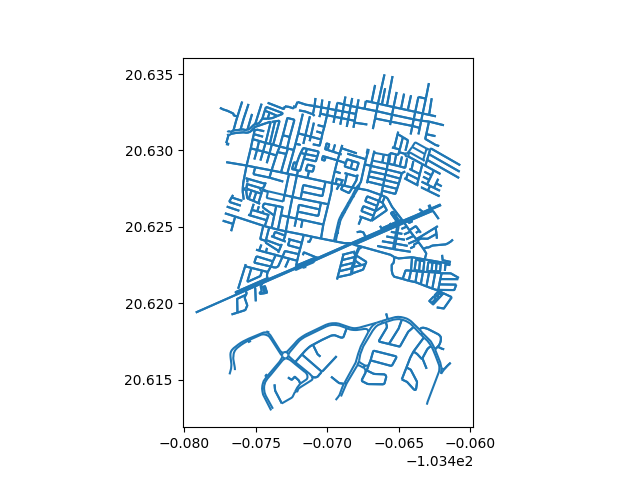

In [8]:
edges.plot()

## OSMnx Google

In [15]:
google_key = ''
G_elev = ox.elevation.add_node_elevations_google(G, api_key=google_key)

In [16]:
nodes_elev_google = ox.graph_to_gdfs(G_elev, nodes=True, edges=False)
print(nodes_elev_google.shape)
nodes_elev_google.head(2)

(711, 5)


,x,y,street_count,elevation,geometry
osmid,,,,,
6575245580,-103.465958,20.634072,1,1684.214,POINT (-103.46596 20.63407)
6575245581,-103.466184,20.633009,3,1681.971,POINT (-103.46618 20.63301)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
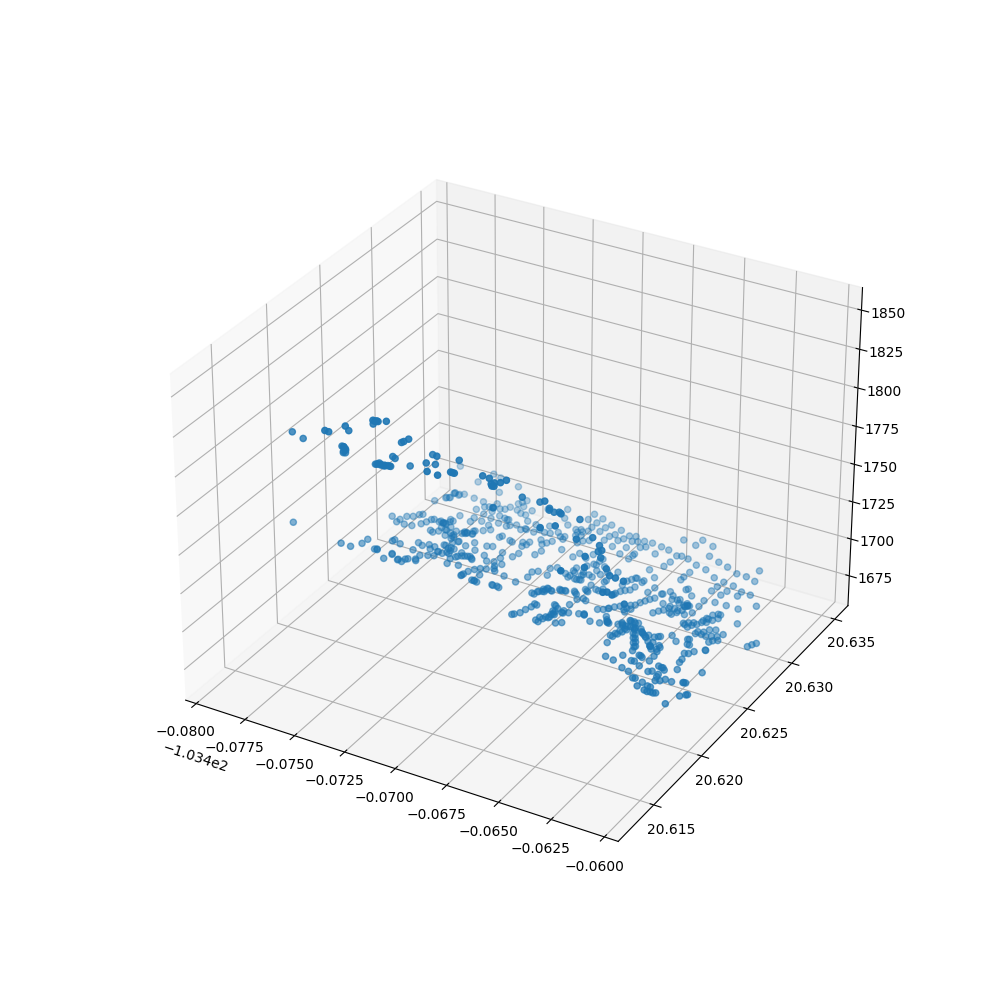

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xs = nodes_elev_google.geometry.x
ys = nodes_elev_google.geometry.y
zs = nodes_elev_google.elevation

ax.scatter(xs, ys, zs)

### OSMnx Raster

In [9]:
filepath = '../data/external/Proximidad_Elevaciones/Medio_Fisico/MDE.tif'
G_elev = ox.elevation.add_node_elevations_raster(G, filepath)

In [10]:
nodes_elev_mde = ox.graph_to_gdfs(G_elev, nodes=True, edges=False)
print(nodes_elev_mde.shape)
nodes_elev_mde.head(2)

(711, 5)


,x,y,street_count,elevation,geometry
osmid,,,,,
6575245580,-103.465958,20.634072,1,1680.0,POINT (-103.46596 20.63407)
6575245581,-103.466184,20.633009,3,1679.0,POINT (-103.46618 20.63301)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
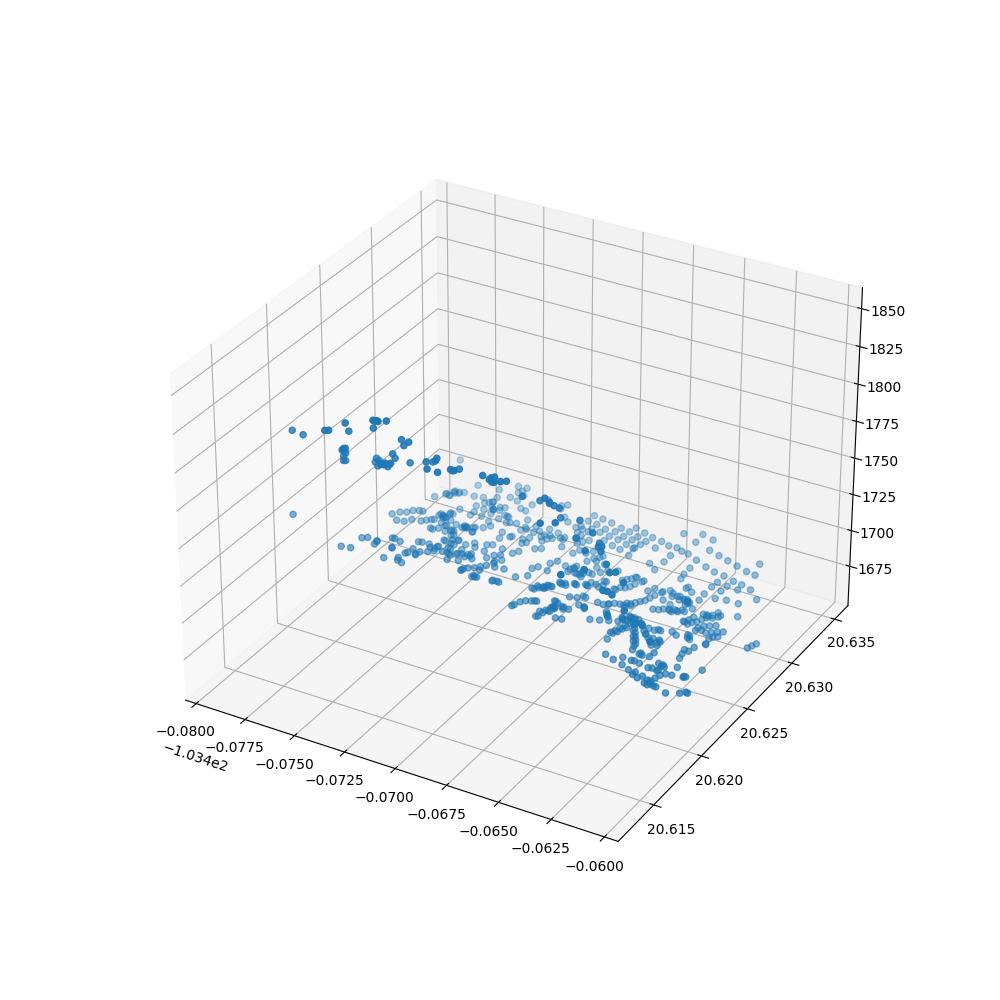

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xs = nodes_elev_mde.geometry.x
ys = nodes_elev_mde.geometry.y
zs = nodes_elev_mde.elevation

ax.scatter(xs, ys, zs)

In [18]:
nodes_elev = nodes_elev_mde.merge(nodes_elev_google, 
                                  left_index=True, right_index=True)

In [19]:
nodes_elev['elev_dif'] = nodes_elev['elevation_x'] - nodes_elev['elevation_y']

In [20]:
nodes_elev['elev_dif']

osmid
6575245580   -4.214
6575245581   -2.971
1653860926   -0.777
6576935573   -2.549
4615225196   -2.946
              ...  
3666177718   -4.276
4615480154   -5.144
4615480156   -5.096
4615480160   -5.003
7700255942    0.082
Name: elev_dif, Length: 711, dtype: float64

In [29]:
dif_mean = round(nodes_elev['elev_dif'].mean(),2)
dif_std = round(nodes_elev['elev_dif'].std(),2)
print(f"Elevation difference mean:{dif_mean} and StD:{dif_std}")

Elevation difference mean:-3.41 and StD:1.93


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
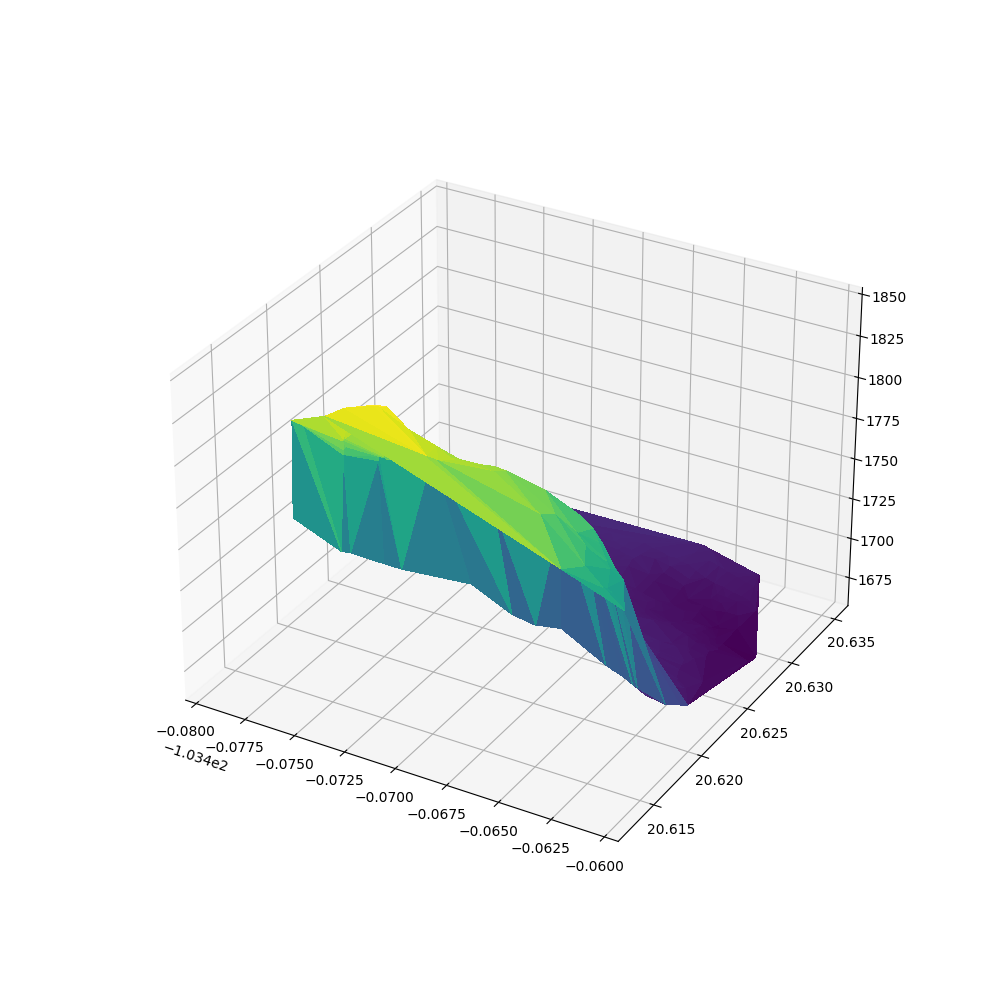

In [12]:
fig = plt.figure(figsize=(10,10))

ax = fig.gca(projection='3d')

surf = ax.plot_trisurf(xs, ys, zs, cmap='viridis',
                       linewidth=0, antialiased=False)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
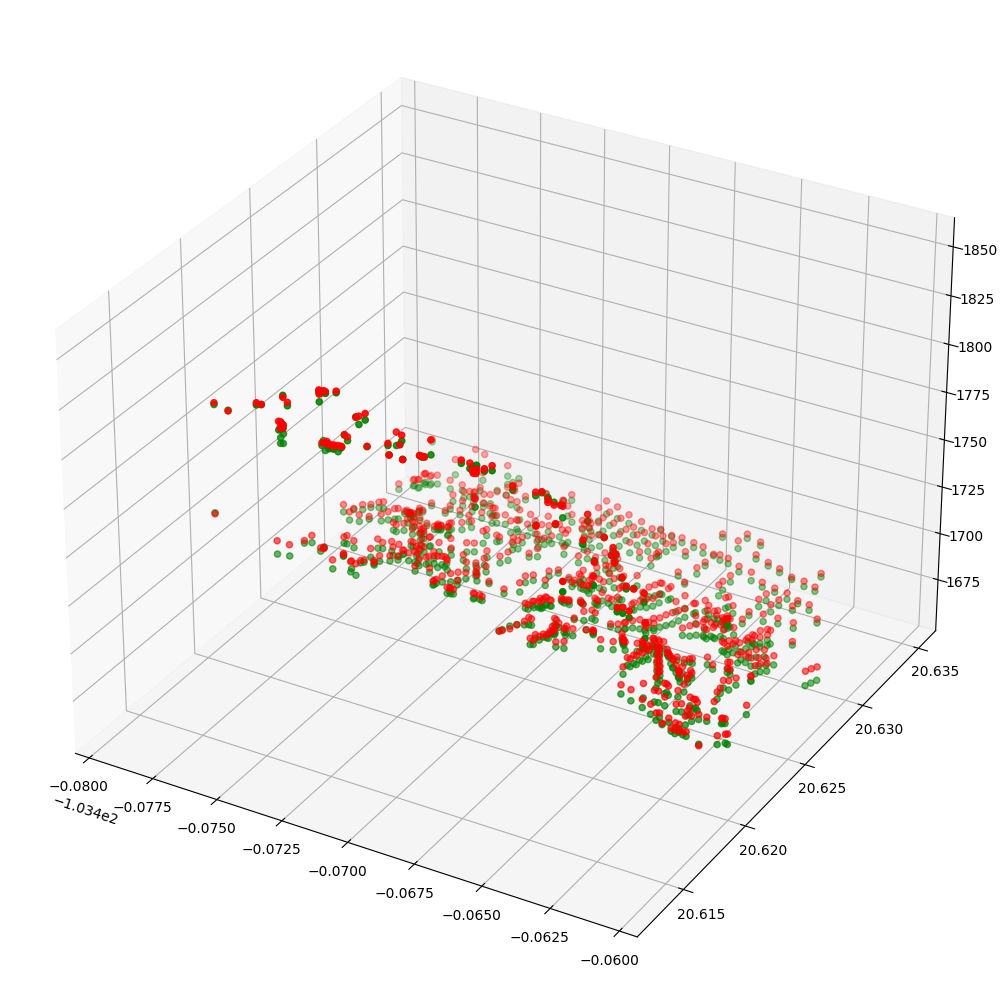

In [29]:
# creating figure
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

xs_m = nodes_elev_mde.geometry.x
ys_m = nodes_elev_mde.geometry.y
zs_m = nodes_elev_mde.elevation

xs_g = nodes_elev_google.geometry.x
ys_g = nodes_elev_google.geometry.y
zs_g = nodes_elev_google.elevation
  
# creating the plot
ax.scatter(xs_m, ys_m, zs_m, color='green')
ax.scatter(xs_g, ys_g, zs_g, color='red')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
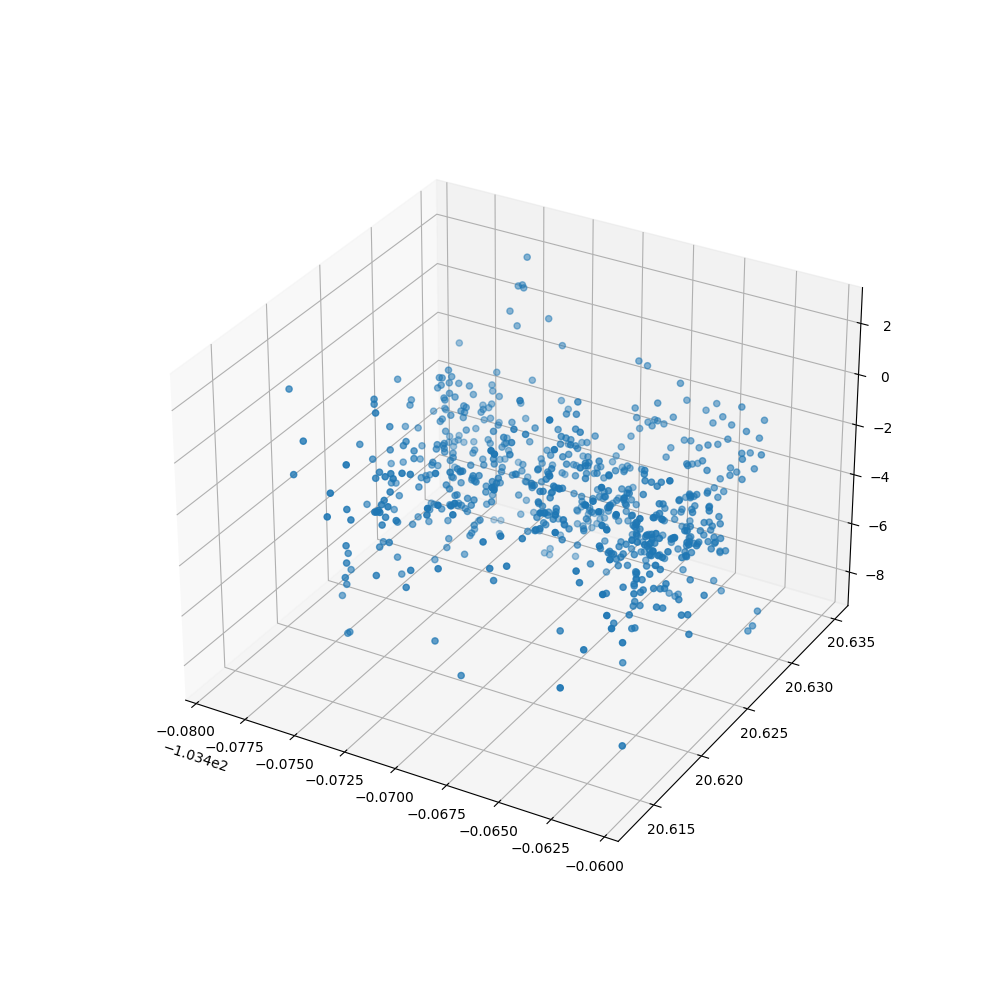

In [30]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xs = nodes_elev['x_x']
ys = nodes_elev['y_x']
zs = nodes_elev.elev_dif

ax.scatter(xs, ys, zs)

In [32]:
 G_elev = ox.elevation.add_edge_grades(G_elev, add_absolute=True, precision=3)

In [33]:
edges_elev = ox.graph_to_gdfs(G_elev, nodes=False, edges=True)
print(edges_elev.shape)
edges_elev.head(5)

(1627, 12)


osmid  oneway             name        highway  \
u          v          key                                                      
6575245580 6575245581 0    700187175   False    Privada Urano  living_street   
6575245581 1653860926 0    466782610   False  Avenida Central    residential   
           6575245580 0    700187175   False    Privada Urano  living_street   
           1941852618 0    466782610   False  Avenida Central    residential   
1653860926 1941852662 0    152579690   False     Calle Uranio    residential   

                            length  \
u          v          key            
6575245580 6575245581 0    120.539   
6575245581 1653860926 0     29.396   
           6575245580 0    120.539   
           1941852618 0     37.404   
1653860926 1941852662 0    217.789   

                                                                    geometry  \
u          v          key                                                      
6575245580 6575245581 0    LINESTRING (-103.46596 20.63407, -103.46618 20...   
6575245581 1653860926 0    LINESTRING (-103.46618 20.63301, -103.46646 20...   
           6575245580 0    LINESTRING (-103.46618 20.63301, -103.46596 20...   
           1941852618 0    LINESTRING (-103.46618 20.63301, -103.46583 20...   
1653860926 1941852662 0    LINESTRING (-103.46646 20.63307, -103.46600 20...   

                           grade  grade_abs lanes junction service maxspeed  
u          v          key                                                    
6575245580 6575245581 0   -0.019      0.019   NaN      NaN     NaN      NaN  
6575245581 1653860926 0   -0.041      0.041     2      NaN     NaN      NaN  
           6575245580 0    0.019      0.019   NaN      NaN     NaN      NaN  
           1941852618 0   -0.002      0.002     2      NaN     NaN      NaN  
1653860926 1941852662 0    0.007      0.007   NaN      NaN     NaN      NaN

<AxesSubplot:>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
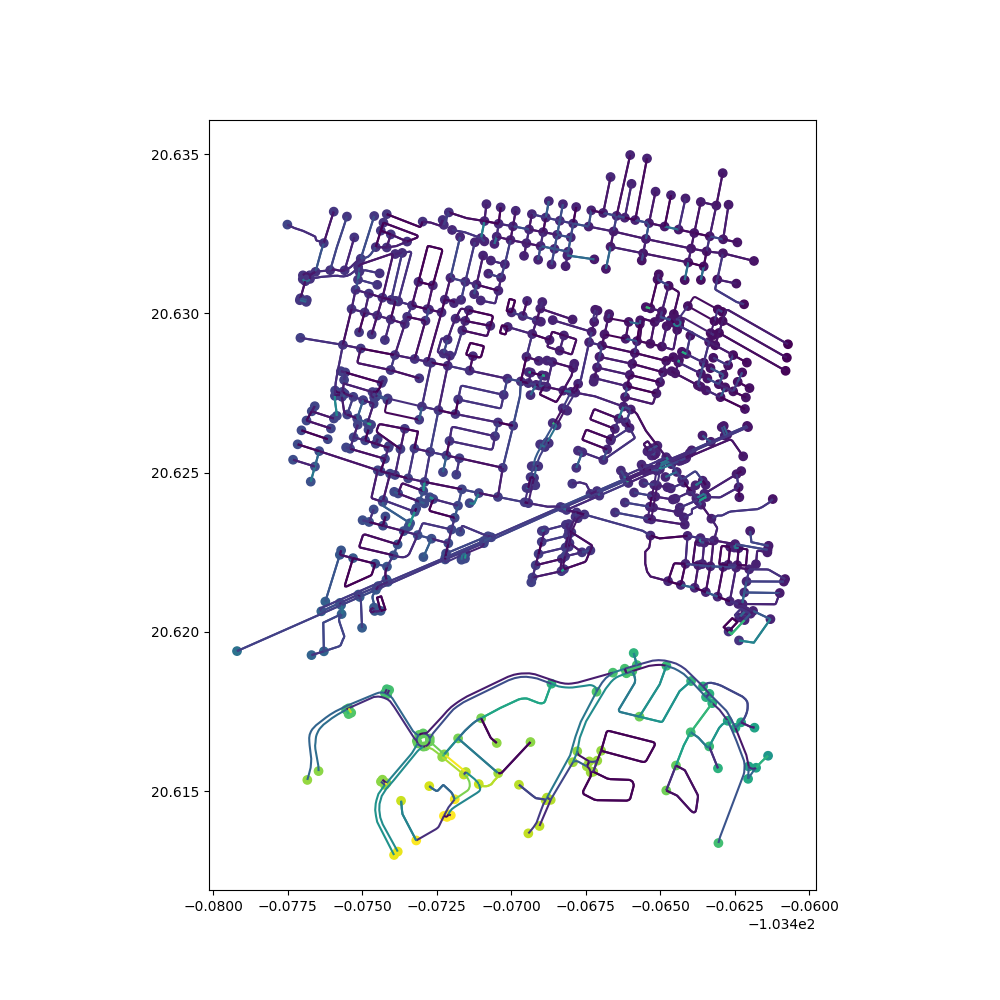

In [59]:
fig = plt.figure(figsize=(10,10))

ax = fig.gca()


edges_elev.plot(column='grade_abs', ax=ax)
nodes_elev_mde.plot(column='elevation', ax=ax)

In [39]:
edges_elev.grade_abs.max()

0.168